In [6]:
!pip install torch --quiet
!pip install gpytorch --quiet

In [47]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import math
import torch
import gpytorch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.gaussian_process as gp


from sklearn.preprocessing import OneHotEncoder


In [8]:
training_data = pd.read_csv('../data/2-uw_layer1_trainingdata.csv')

In [9]:
training_data.head()

,BOREHOLE_ID,BOREHOLE_NAME,BOREHOLE_TYPE,BOREHOLE_DEPTH_FT,ELEVATION_FT,LATITUDE,LONGITUDE,LAYER_NUMBER,TOP_DEPTH_FT,BOTTOM_DEPTH_FT,USCS,SIMPLE_USCS,LAYER_THICKNESS_FT,geometry,MAPPED_UNIT,SLOPE,ROUGHNESS
0,7138,B-1,Geotechnical,20.3,167.8,47.656719,-122.305728,1,0.0,1.0,SP,S,1.0,POINT (-122.30572826225551 47.65671910427262),Qvt,3.668571,18.199593
1,7143,B-1-92,Geotechnical,48.5,123.2,47.653642,-122.306837,1,0.0,1.0,ML,M,1.0,POINT (-122.30683733651996 47.653641992071),Qvt,2.222722,10.232103
2,7144,B-2-92,Geotechnical,42.5,122.9,47.653766,-122.306468,1,0.0,1.0,ML,M,1.0,POINT (-122.30646818846918 47.653765607387086),Qvt,1.996012,9.385303
3,7145,B-3-92,Geotechnical,43.0,117.3,47.653256,-122.306638,1,0.0,1.0,ML,M,1.0,POINT (-122.30663757111256 47.65325573559402),Qvt,3.011285,14.187020
4,7146,B-4-92,Geotechnical,43.0,123.4,47.653709,-122.306259,1,0.0,0.5,SM,S,0.5,POINT (-122.30625929325416 47.65370851868135),Qvt,1.996012,9.385303


<Axes: title={'center': 'LAYER_THICKNESS_FT'}, xlabel='USCS'>

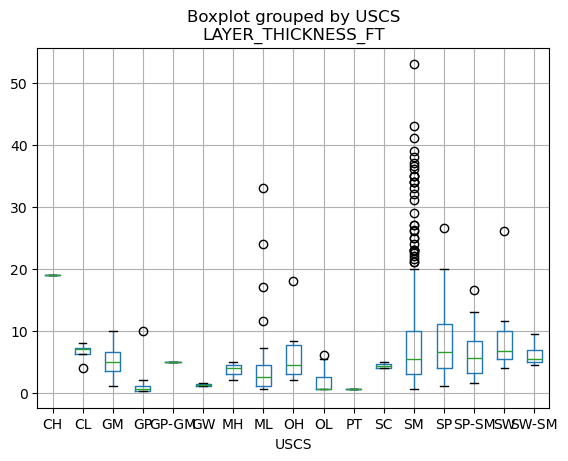

In [11]:
training_data.boxplot(column='LAYER_THICKNESS_FT', by='USCS')

<Axes: title={'center': 'SLOPE'}, xlabel='USCS'>

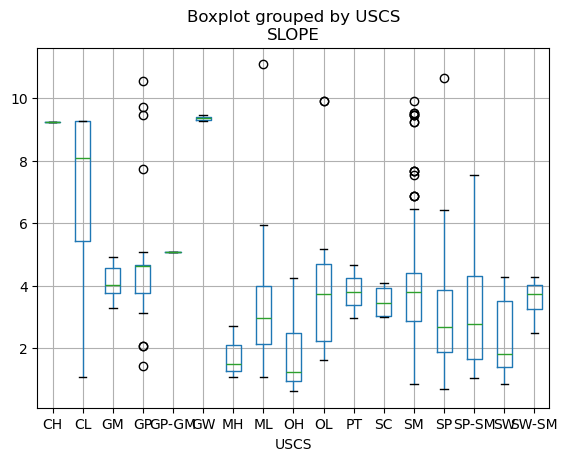

In [22]:
training_data.boxplot(column='SLOPE', by='USCS')

<Axes: title={'center': 'ROUGHNESS'}, xlabel='USCS'>

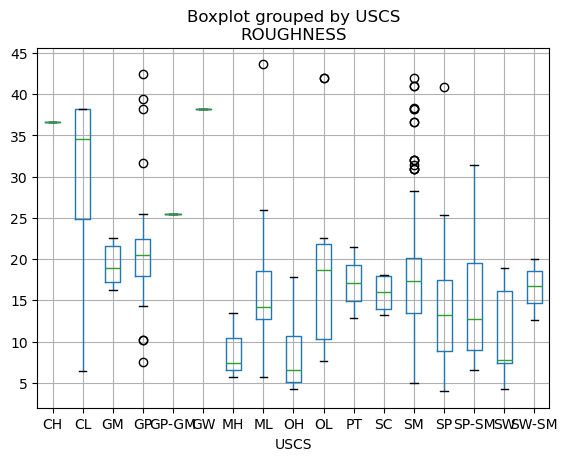

In [23]:
training_data.boxplot(column='ROUGHNESS', by='USCS')

<Axes: title={'center': 'LAYER_THICKNESS_FT'}, xlabel='SIMPLE_USCS'>

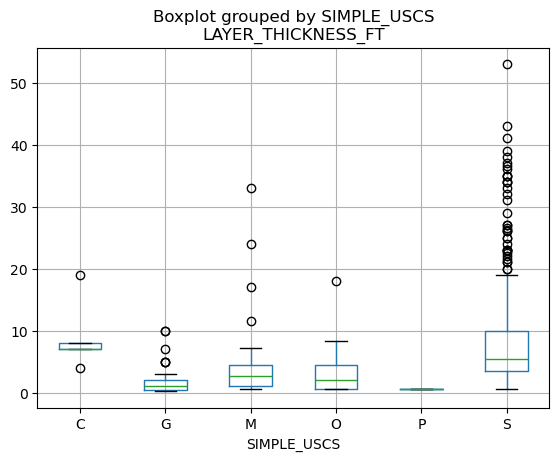

In [24]:
training_data.boxplot(column='LAYER_THICKNESS_FT', by='SIMPLE_USCS')

<Axes: title={'center': 'SLOPE'}, xlabel='SIMPLE_USCS'>

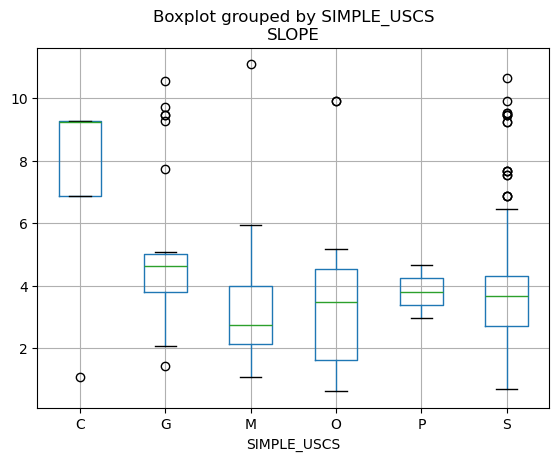

In [25]:
training_data.boxplot(column='SLOPE', by='SIMPLE_USCS')

<Axes: title={'center': 'ROUGHNESS'}, xlabel='SIMPLE_USCS'>

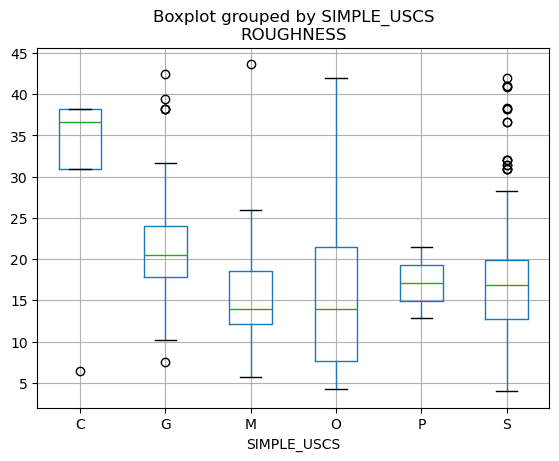

In [26]:
training_data.boxplot(column='ROUGHNESS', by='SIMPLE_USCS')

In [27]:
# for the classification model
X_c = training_data[['MAPPED_UNIT','SLOPE','ROUGHNESS']]
y_c = training_data['SIMPLE_USCS']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

# for the regression model
X_r = training_data[['MAPPED_UNIT','SLOPE','ROUGHNESS']]
y_r = training_data['LAYER_THICKNESS_FT']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [35]:
myGPR = gp.GaussianProcessRegressor()

In [34]:
myGPC = gp.GaussianProcessClassifier()

In [48]:
enc = OneHotEncoder(handle_unknown='ignore')

In [56]:
encoded_mapped_unit = enc.transform(training_data[['MAPPED_UNIT']]).toarray()

In [57]:
pd.DataFrame(encoded_mapped_unit)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())# merge with main df bridge_df on key values
bridge_df = bridge_df.join(enc_df)
bridge_df

In [45]:
y_train_r

477     2.0
15      5.5
332     3.0
423     5.5
19      0.3
       ... 
106     4.5
270    15.0
348     1.0
435     7.0
102     4.5
Name: LAYER_THICKNESS_FT, Length: 404, dtype: float64

In [44]:
myGPR.fit(X_train_r, y_train_r)

ValueError: could not convert string to float: 'Qvt'